# Algoritmos de optimización - Seminario<br>
**Nombre y Apellidos:** <br>
**Url:** https://github.com/cedaniel200/algoritmos-optimizacion/tree/main/proyecto<br>

**Problema:**
- Sesiones de doblaje <br>

**Descripción del problema:**

Se precisa coordinar el doblaje de una película. Los actores del doblaje deben coincidir en las
tomas en las que sus personajes aparecen juntos en las diferentes tomas. Los actores de
doblaje cobran todos la misma cantidad por cada día que deben desplazarse hasta el estudio de
grabación independientemente del número de tomas que se graben. No es posible grabar más
de 6 tomas por día. El objetivo es planificar las sesiones por día de manera que el gasto por los
servicios de los actores de doblaje sea el menor posible. Los datos son:

- **Número de actores:** 10
- **Número de tomas:** 30
- **Actores/Tomas:** https://bit.ly/36D8IuK
    - **1** indica que el actor participa en la toma
    - **0** en caso contrario

**(*) La respuesta es obligatoria**
                                        

In [100]:
# Realizamos las importaciones necesarias para el proyecto.
import math
import time

**(*)¿Cuantas posibilidades hay sin tener en cuenta las restricciones?**<br>

Realizando un analisis al problema planteado, las posibilidades sin tener en cuenta las restricciones definen el tamaño de nuestro espacio de busqueda inicial, en este caso estara determinado por n! combinaciones, donde n = 30, siendo n la cantidad de tomas a realizar.

In [95]:
# Realizamos el calculo n! donde n es la cantidad de tomas.

n = 30
posibilidades = math.factorial(n)
print(f"Las posibilidades (espacio de busqueda) sin tener en cuenta la restriccion del problema son {posibilidades}.")

Las posibilidades (espacio de busqueda) sin tener en cuenta la restriccion del problema son 265252859812191058636308480000000.


**¿Cuantas posibilidades hay teniendo en cuenta todas las restricciones?.**

Ahora bien, para este punto, debemos tener muy claras las restricciones que se nos plantea en el problema, las cuales son:

- No es posible grabar mas de 6 tomas por dia.

Vamos a analizar lo que implica esta restricción, de la forma más eficiente tendriamos que, como podemos grabar un máximo de 6 tomas por dia, entonces si un actor participa en la grabacion de las 30 tomas, le llevaría 5 días para completar todas las tomas, el caso menos eficiente seria que un actor que participa en las 30 tomas grabe 1 toma por día lo que le llevaria 30 días para completar todas las tomas.

Si nos vamos por la primera opción y si el orden de los días de grabacion no importa podriamos utilizar la formula de combinaciones sin repeticion:

$$\begin{aligned}
\binom{n}{k} = \frac{n!}{k! \cdot (n-k)!}
\end{aligned}$$

Considerando lo anterior, debemos garantizar realizar los cálculos para 30!, 24!, 18!, 12! y 6!, que nos determinaran cuantas posibilidades se encuentran disponibles considerando las restricciones. Para realizar dichos cálculos vamos a crear un pequeño código hallando las combinaciones día a día, para luego realizar la multiplización de los resultados de cada día para obtener el total de combinaciones considerando las restricciones, realizando el cálculo matemático utilizando la formula obtenemos el valor de _1370874167589326400_. Vamos a comprobarlo con la siguiente implementación:

In [96]:
""" Calculamos todas las combinaciones considerando las restricciones. """
def calcular_combinaciones(n, k):
    total = 1
    cantidad_valores = list(range(n, 0, -k))
    # Ciclo que va desde n hasta 1, reduciendo 6 en 6 en cada iteración.
    for i in cantidad_valores:
        combinacion_dia = combinaciones(i, k)
        combinaciones_por_dia_de_grabacion.append(combinacion_dia)
        total *= combinacion_dia # Multiplica el la combinacion del dia por el valor anterior que tenga total.
    return combinaciones_por_dia_de_grabacion, total, cantidad_valores

""" Imprimir los resultados de combinaciones por dia de grabacion, y total de combinaciones """
def imprimir_combinaciones_por_dia(combinaciones_por_dia_de_grabacion, total, cantidad_valores):
    # Hallamos las combinaciones de cada dia.
    for i, (n, combinacion_dia) in enumerate(zip(cantidad_valores, combinaciones_por_dia_de_grabacion), 1):
        print(f"Combinaciones del día {i} ({n}!,{k}) = {combinacion_dia}")

    # Hallamos el total de combinaciones considerando las restricciones.
    print(f"Total de combinaciones = {total} posibles combinaciones.")
    print("Se obtiene de la multiplicacion las combinaciones de cada dia.")


""" Calculamos el factorial """
def calcular_factorial(n):
    if n == 0 or n == 1:
        return 1
    else:
        return n * calcular_factorial(n - 1)

"""Calculamos las combinaciones."""
def combinaciones(n, k):
    return calcular_factorial(n) // (calcular_factorial(k) * calcular_factorial(n - k)) # Usamos la formula de las combinaciones sin repeticion que es: n! / [k!(n-k)!].

## --------- LLAMANDO A LAS FUNCIONES  ---------------- ##
combinaciones_por_dia_de_grabacion = []
total_combinaciones = 0
n=30
k=6

combinaciones_por_dia_de_grabacion, total_combinaciones, cantidad_valores = calcular_combinaciones(n,k)
imprimir_combinaciones_por_dia(combinaciones_por_dia_de_grabacion, total_combinaciones, cantidad_valores)

## --------------------------------------------------- ##

Combinaciones del día 1 (30!,6) = 593775
Combinaciones del día 2 (24!,6) = 134596
Combinaciones del día 3 (18!,6) = 18564
Combinaciones del día 4 (12!,6) = 924
Combinaciones del día 5 (6!,6) = 1
Total de combinaciones = 1370874167589326400 posibles combinaciones.
Se obtiene de la multiplicacion las combinaciones de cada dia.


### Modelo para el espacio de soluciones<br>
**(*) ¿Cual es la estructura de datos que mejor se adapta al problema? Argumentalo.(Es posible que hayas elegido una al principio y veas la necesidad de cambiar, argumentalo)**


Para este problema los datos que nos entregas son tabulares por lo cual la estructura de datos que nos permite representar de mejor manera datos tabulares es una matriz.

Al momento de plantear una solución si se quiere representar las sesiones de doblaje y las tomas en dichas sesiones, con la restricción de 6 tomas máximas por día, la estructura de datos que mejor se adapta desde nuestro punto de vista es la matriz, ya que, nos permite representar cada sesión como una fila y en cada columna las tomas por sesión.

In [97]:
actores_tomas = [
    [1, 1, 1, 1, 1, 0, 0, 0, 0, 0],
    [0, 0, 1, 1, 1, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 1, 0, 1, 0, 0, 0],
    [1, 1, 0, 0, 0, 0, 1, 1, 0, 0],
    [0, 1, 0, 1, 0, 0, 0, 1, 0, 0],
    [1, 1, 0, 1, 1, 0, 0, 0, 0, 0],
    [1, 1, 0, 1, 1, 0, 0, 0, 0, 0],
    [1, 1, 0, 0, 0, 1, 0, 0, 0, 0],
    [1, 1, 0, 1, 0, 0, 0, 0, 0, 0],
    [1, 1, 0, 0, 0, 1, 0, 0, 1, 0],
    [1, 1, 1, 0, 1, 0, 0, 1, 0, 0],
    [1, 1, 1, 1, 0, 1, 0, 0, 0, 0],
    [1, 0, 0, 1, 1, 0, 0, 0, 0, 0],
    [1, 0, 1, 0, 0, 1, 0, 0, 0, 0],
    [1, 1, 0, 0, 0, 0, 1, 0, 0, 0],
    [0, 0, 0, 1, 0, 0, 0, 0, 0, 1],
    [1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 1, 0, 0, 0, 0],
    [1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
    [1, 0, 1, 1, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 1, 0, 1, 0, 0],
    [1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
    [1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 1, 0, 0, 0, 0],
    [1, 1, 0, 1, 0, 0, 0, 0, 0, 1],
    [1, 0, 1, 0, 1, 0, 0, 0, 1, 0],
    [0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
    [1, 0, 0, 1, 0, 0, 0, 0, 0, 0],
    [1, 0, 0, 0, 1, 1, 0, 0, 0, 0],
    [1, 0, 0, 1, 0, 0, 0, 0, 0, 0],
]

### Según el modelo para el espacio de soluciones<br>
**(*)¿Cual es la función objetivo?**

Para identificar la función objetivo partamos por realizar la **formalización matemática**:

Sea $C$, el costo de servicio de un actor de doblaje por día.<br>
Sea $n$, el índice que representa cada sesión (día de grabación).<br>
Sea $x_{n}$, la cantidad de actores unicos requeridos en la sesión $n$.<br>
Sea $z_{n}$, la cantidad de tomas asignadas a la sesión $n$.<br>


Para hallar cada $x_n$, debemos tener en cuenta la relación entre tomas y actores: Una sesión $n$ se compone de un conjunto de $z_n$ tomas. Como cada toma requiere un elenco específico, la cantidad de actores para la sesión ($x_n$) se determina calculando la unión de todos los actores que participan en las $z_n$ tomas asignadas a ese día (eliminando duplicados, ya que un actor cobra lo mismo si hace 1 o 6 tomas en esa sesión).

$$\min_x f(x) =C.(x_{1}+x_{2}+x_{3}+...+x_{n})$$

Restricción:

$z_n \leq 6$ <br>

x = Enteros<br>
z = Enteros<br>

Dada la anteriore formalización matemática, la **formula objetivo** es:
$$\min_x f(x) =C.(x_{1}+x_{2}+x_{3}+...+x_{n})$$

**(*)¿Es un problema de maximización o minimización?**

Es un problema de minimización, ya que, se busca que el gasto por los servicios de los actores de doblaje sea el menor posible.

## Diseña un algoritmo para resolver el problema por fuerza bruta

In [141]:
mejor_costo_global = float('inf')
mejor_sesiones_global = []
nodos_evaluados = 0

def calcular_costo_total(sesiones, actores_tomas):
    costo_total = 0
    num_actores = len(actores_tomas[0])
    for sesion in sesiones:
        actores_del_dia = [0] * num_actores

        for toma in sesion:
            actores_toma = actores_tomas[toma]
            for i in range(len(actores_toma)):
                if actores_del_dia[i] == 0 and actores_toma[i] == 1:
                    actores_del_dia[i] = 1
                    costo_total += 1

    return costo_total

def coordinar_doblaje_fuerza_bruta(indice_toma, tomas, sesiones_actual, actores_tomas):
    global mejor_costo_global, mejor_sesiones_global, nodos_evaluados

    # Si ya acomodamos todas las tomas (llegamos al final de la lista)
    if indice_toma == len(tomas):
        nodos_evaluados += 1
        costo_actual = calcular_costo_total(sesiones_actual, actores_tomas)

        # Si esta combinación es mejor que la que teníamos, la guardamos
        if costo_actual < mejor_costo_global:
            mejor_costo_global = costo_actual
            # Hacemos una copia profunda de la lista de listas
            mejor_sesiones_global = [list(dia) for dia in sesiones_actual]
        return

    toma_actual = tomas[indice_toma]

    # Se intenta agregar la toma actual a un día que ya exista
    for i in range(len(sesiones_actual)):
        # Solo se agregará si el día tiene menos de 6 tomas
        if len(sesiones_actual[i]) < 6:
            sesiones_actual[i].append(toma_actual)
            coordinar_doblaje_fuerza_bruta(indice_toma + 1, tomas, sesiones_actual, actores_tomas)
            sesiones_actual[i].pop()

    # Se crea un nuevo día exclusivamente para la toma
    sesiones_actual.append([toma_actual])
    coordinar_doblaje_fuerza_bruta(indice_toma + 1, tomas, sesiones_actual, actores_tomas)

    sesiones_actual.pop()


# Para evitar que la maquina colapse por la complejidad computacional (Complejidad Temporal (Tiempo de Ejecución))
# se decide hacer una prueba usando solo las primeras 12 tomas (0 al 12)
actores_tomas_demo = [fila[:] for fila in actores_tomas[:12]]
lista_de_tomas = list(range(len(actores_tomas_demo)))
sessiones_vacia = []

coordinar_doblaje_fuerza_bruta(0, lista_de_tomas, sessiones_vacia, actores_tomas_demo)

print("\n--- RESULTADO DE LA FUERZA BRUTA ---")
print("Nodos evaluados:", nodos_evaluados)
print("Mejor Costo (Salarios mínimos a pagar):", mejor_costo_global)
print("Sesiones:", mejor_sesiones_global)


--- RESULTADO DE LA FUERZA BRUTA ---
Nodos evaluados: 4163743
Mejor Costo (Salarios mínimos a pagar): 14
Sesiones: [[0, 1, 2, 3, 4, 10], [5, 6, 7, 8, 9, 11]]


##Calcula la complejidad del algoritmo por fuerza bruta

**Complejidad Temporal (Tiempo de Ejecución):** Para calcular el tiempo en un algoritmo recursivo, debemos mirar el factor de ramificación del árbol de búsqueda (cuántos caminos nuevos se abren en cada paso). Para lo anterior debemos analizar conceptualmente que hace el algoritmo en cada toma:
- Toma 1: Solo tiene 1 opción (crear el Día 1), es decir, 1 camino
- Toma 2: Tiene 2 opciones (meterse en el Día 1, o crear el Día 2), es decir 2 caminos
- Toma 3: En el peor de los casos, tiene 3 opciones (Día 1, Día 2, o Día 3), es decir, 3 caminos
- Toma $n$: En el peor de los casos, tendría hasta $n$ opciones (meterse en alguno de los $n-1$ días previos, o crear el día $n$).

Para saber el total de combinaciones, se debe multiplicar las opciones de cada nivel: $1 \times 2 \times 3 \times ... \times n$. Matemáticamente, esto es la definición exacta de $n!$ (n factorial).

Ahora hay que tener en cuenta la restricción de "máximo 6 tomas" que poda algunas ramas lo que evita que crezca exactamente hasta $n!$, en la teoría de la complejidad computacional (notación Big-O), el límite superior asintótico sigue perteneciendo a la clase factorial.

**(*)Diseña un algoritmo que mejore la complejidad del algortimo por fuerza bruta. Argumenta porque crees que mejora el algoritmo por fuerza bruta**

Para mejorar el algoritmo de Fuerza Bruta, utilizaremos un algoritmo Voraz (Greedy) en el cual vamos a ir generando combinaciones de 6 números que representa las tomas a doblar por sesión entre un rango de 0 a 29 que representan las 30 tomas y en cada iteración vamos a ir excluyendo las tomas ya dobladas, se asumirá que si en cada iteración sacamos la sesión con las tomas más baratas al final el conjunto de sesiones sera el más barato.


**Eficiencia Computacional:** El algoritmo voraz que se va a plantear es una mejora absoluta desde el punto de vista de la viabilidad, ya que, la Fuerza Bruta Tiene una complejidad temporal de $O(n!)$. Como se mencionó en el punto anterior, intentar resolver las 30 tomas colapsaría cualquier computadora moderna porque evaluaría trillones de combinaciones, pero este nuevo algoritmo Voraz, tiene una complejidad temporal polinomial que veremos más adelante. Esto significa que el código voraz resuelve el problema de las 30 tomas en milisegundos o segundos dependiendo de las caracteristicas de la maquina, por lo anterior pasar de un tiempo infinito a milisegundos o segundos es, sin duda, una mejora considerable.


Es importante dejar claro que no es una mejora pura en lo que concierne a la optimización estricta, ya que, este algoritmo Voraz genera una pérdida del Óptimo Global, debido a que se enfoca en Óptimos locales, una "mejora" real sería un algoritmo que reduzca el tiempo pero siga garantizando la mejor respuesta posible.

In [142]:
nodos_evaluados_voraz = 0

def obtener_mejor_sesion(disponibles, actores_tomas, limite_dia=6):
    mejor_costo = float('inf')
    mejor_sesion = []

    tomas_a_agrupar = min(limite_dia, len(disponibles))

    def buscar_combinacion_local(indice, sesion_actual):
        global nodos_evaluados_voraz
        nonlocal mejor_costo, mejor_sesion

        # Si ya tenemos las tomas necesarias para el día
        if len(sesion_actual) == tomas_a_agrupar:
            nodos_evaluados_voraz += 1
            costo_actual = calcular_costo_total([sesion_actual], actores_tomas)

            if costo_actual < mejor_costo:
                mejor_costo = costo_actual
                mejor_sesion = list(sesion_actual)
            return

        # Si ya no hay más opciones para agregar
        if indice >= len(disponibles):
            return

        # Se incluyen la toma actual en la combinación
        sesion_actual.append(disponibles[indice])
        buscar_combinacion_local(indice + 1, sesion_actual)
        sesion_actual.pop()

        tomas_faltantes = tomas_a_agrupar - len(sesion_actual)
        tomas_restantes = len(disponibles) - (indice + 1)

        if tomas_restantes >= tomas_faltantes:
            buscar_combinacion_local(indice + 1, sesion_actual)

    buscar_combinacion_local(0, [])
    return mejor_sesion, mejor_costo


def coordinar_doblaje_greedy(disponibles, actores_tomas):
    # Si ya no hay tomas, terminamos de planificar (Costo 0)
    if not disponibles:
        return [], 0

    # Buscamos la mejor sesión posible con las tomas actuales
    mejor_sesion_del_dia, costo_del_dia = obtener_mejor_sesion(disponibles, actores_tomas)

    # Filtramos las tomas, eliminando las que ya se fijaron en este día
    nuevas_disponibles = [toma for toma in disponibles if toma not in mejor_sesion_del_dia]

    # Se planifica los días restantes con lo que sobró
    sesiones_futuras, costo_futuro = coordinar_doblaje_greedy(nuevas_disponibles, actores_tomas)

    # Unimos el día de hoy con los días futuros, y sumamos sus costos
    planificacion_total = [mejor_sesion_del_dia] + sesiones_futuras
    costo_total = costo_del_dia + costo_futuro

    return planificacion_total, costo_total


nodos_evaluados_voraz = 0
todas_las_tomas = list(range(len(actores_tomas)))
sesiones_finales, costo_final = coordinar_doblaje_greedy(todas_las_tomas, actores_tomas)

print("\n--- RESULTADO DE VORAZ (GREEDY) ---")
print("Nodos evaluados (combinaciones de día) :", nodos_evaluados_voraz)
print("Mejor Costo (Salarios mínimos a pagar):", costo_final)
print("Sesiones:", sesiones_finales)


--- RESULTADO DE VORAZ (GREEDY) ---
Nodos evaluados (combinaciones de día) : 747860
Mejor Costo (Salarios mínimos a pagar): 29
Sesiones: [[13, 16, 17, 18, 22, 23], [1, 12, 19, 26, 27, 29], [0, 2, 5, 6, 8, 14], [3, 4, 7, 11, 20, 21], [9, 10, 15, 24, 25, 28]]


Como **conlusión** podemos decir que el algoritmo Voraz (Greedy) implementado supone una mejora drástica en términos de complejidad computacional frente a la de Búsqueda Exhaustiva (Fuerza Bruta), logrando pasar de un tiempo de ejecución intratable ($O(n!)$) a un tiempo polinomial de apenas unos milisegundos o segundos. Sin embargo, no puede considerarse una mejora algorítmica perfecta, ya que sacrifica la garantía matemática de hallar el Óptimo Global.

**(*)Calcula la complejidad del algoritmo**

**Complejidad Temporal (Tiempo de Ejecución):** Para analizar la complejidad de este algoritmo nos debemos centrar en la funcion **buscar_combinacion_local**, ya que, es la que genera las posibles combinaciones de 6 tomas para un sesión, veamos los escenarios:

- El peor escenario se da en el Día 1, el algoritmo tiene $N$ tomas disponibles (ej. 30) y debe formar grupos de $k=6$, matemáticamente, el número de combinaciones a evaluar en el primer día es $\binom{N}{6}$. La fórmula de las combinaciones $\binom{N}{k}$ se expande como $\frac{N(N-1)(N-2)...(N-k+1)}{k!}$, si eliminamos las constantes y los términos menores (como se hace en la notación asintótica Big-O), el término dominante de esa multiplicación es $N^k$.

- En los días posteriores (Día 2, Día 3...), el número de tomas disponibles $N$ es menor, por lo que el Día 1 es siempre el "cuello de botella" computacional que define el límite superior del tiempo.

Considerando lo anterior en este caso particular la **Complejidad Temporal (Tiempo de Ejecución)** es de $O(n^6)$.

## Grafica Complejidad Temporal - Algoritmo Voraz vs Fuerza Bruta:

A continuación utilizando los datos de Actores/Tomas se usaran los dos algoritmozas para muestras de dichos datos desde 6 tomas hasta 12 tomas, graficando los resultados en terminos de tiempo.

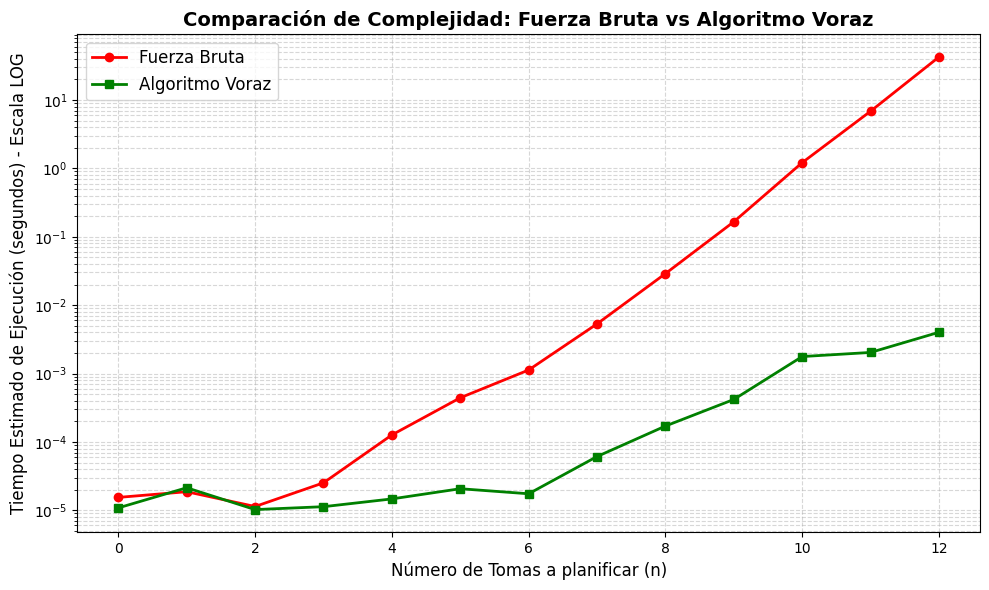

In [114]:
import matplotlib.pyplot as plt

n_valores = []
tiempo_fuerza_bruta = []
tiempo_voraz = []
for i in range(0, 13):
  n_valores.append(i)
  actores_tomas_demo = [fila[:] for fila in actores_tomas[:i]]

  inicio_fuerza_bruta = time.perf_counter()
  lista_de_tomas = list(range(len(actores_tomas_demo)))
  sessiones_vacia = []
  coordinar_doblaje_fuerza_bruta(0, lista_de_tomas, sessiones_vacia, actores_tomas_demo)
  fin_fuerza_bruta = time.perf_counter()
  tiempo_total_fuerza_bruta = fin_fuerza_bruta - inicio_fuerza_bruta
  tiempo_fuerza_bruta.append(tiempo_total_fuerza_bruta)

  inicio_voraz = time.perf_counter()
  nodos_evaluados_voraz = 0
  todas_las_tomas = list(range(len(actores_tomas_demo)))
  sesiones_finales, costo_final = coordinar_doblaje_greedy(todas_las_tomas, actores_tomas_demo)
  fin_voraz = time.perf_counter()
  tiempo_total_voraz = fin_voraz - inicio_voraz
  tiempo_voraz.append(tiempo_total_voraz)

plt.figure(figsize=(10, 6))

plt.plot(n_valores, tiempo_fuerza_bruta, label='Fuerza Bruta', color='red', marker='o', linewidth=2)
plt.plot(n_valores, tiempo_voraz, label='Algoritmo Voraz', color='green', marker='s', linewidth=2)

plt.yscale('log')

plt.title('Comparación de Complejidad: Fuerza Bruta vs Algoritmo Voraz', fontsize=14, fontweight='bold')
plt.xlabel('Número de Tomas a planificar (n)', fontsize=12)
plt.ylabel('Tiempo Estimado de Ejecución (segundos) - Escala LOG', fontsize=12)

plt.grid(True, which="both", ls="--", alpha=0.5)

plt.legend(fontsize=12)

plt.tight_layout()
plt.show()

## Según el problema (y tenga sentido), diseña un juego de datos de entrada aleatorios

Respuesta

In [144]:
import numpy as np

def generar_matriz_tomas_actores(num_tomas, num_actores):
  filas, columnas = num_tomas, num_actores
  return np.random.randint(0, 2, size=(filas, columnas))

actores_tomas_aleatorio = generar_matriz_tomas_actores(12, 15)
print(actores_tomas_aleatorio)

[[1 0 1 1 0 0 0 0 1 0 0 1 0 1 0]
 [0 0 1 0 0 0 0 1 1 1 0 0 0 1 1]
 [0 1 1 0 1 0 0 1 0 0 1 1 0 1 1]
 [0 1 0 1 1 0 0 0 0 1 1 1 1 1 0]
 [0 0 1 0 1 0 0 0 1 1 1 0 1 1 0]
 [1 1 1 1 0 1 0 1 1 1 1 0 0 0 0]
 [0 1 0 1 1 1 0 1 0 1 0 0 0 0 0]
 [0 1 1 0 1 0 1 0 1 0 1 1 1 0 1]
 [0 1 0 0 0 1 1 0 0 0 1 0 1 0 1]
 [0 0 1 0 1 1 1 0 0 0 0 0 1 0 1]
 [0 1 1 1 0 0 0 0 0 1 0 0 0 0 0]
 [0 1 1 1 1 0 0 1 1 0 0 1 0 0 1]]


## Aplica el algoritmo al juego de datos generado

Respuesta

In [145]:
nodos_evaluados_voraz = 0
todas_las_tomas = list(range(len(actores_tomas_aleatorio)))
sesiones_finales, costo_final = coordinar_doblaje_greedy(todas_las_tomas, actores_tomas_aleatorio)

print("\n--- RESULTADO DE VORAZ (GREEDY) ---")
print("Nodos evaluados (combinaciones de día) :", nodos_evaluados_voraz)
print("Mejor Costo (Salarios mínimos a pagar):", costo_final)
print("Sesiones:", sesiones_finales)


--- RESULTADO DE VORAZ (GREEDY) ---
Nodos evaluados (combinaciones de día) : 925
Mejor Costo (Salarios mínimos a pagar): 27
Sesiones: [[1, 2, 3, 4, 10, 11], [0, 5, 6, 7, 8, 9]]


## Enumera las referencias que has utilizado(si ha sido necesario) para llevar a cabo el trabajo

Respuesta

Describe brevemente las lineas de como crees que es posible avanzar en el estudio del problema. Ten en cuenta incluso posibles variaciones del problema y/o variaciones al alza del tamaño

Para avanzar en el estudio de este problema se podrian usar diferentes enfoques:

- **Implementación de metaheurísticas:** La línea de investigación inmediata es aplicar algoritmos inspirados en la naturaleza o en la física para explorar inteligentemente el espacio de búsqueda, como por ejemplo: Algoritmos Genéticos o Recocido Simulado.

- **La preparación para problemas a gran escala:** En este enfoque es importante centrarnos en la escalabilidad, por lo que algortimos de Hibridación (Algoritmos Meméticos) y Paralelización serian de utilidad.

- **La introducción de restricciones complejas del mundo real:** En la vida real, el problema se vuelve mucho más complejo, abriendo las siguientes líneas de estudio:
  - Costos Heterogéneos (Pesos variables): En lugar de un costo fijo $C$ para todos, cada actor tiene su propio costo.
  - La restricción de "máximo 6 tomas por día" es artificial, en la realidad, una toma sencilla puede tardar 10 minutos, y una más compleja más de 2 horas, por lo cual la restricción cambiaría a "máximo 8 horas de grabación por día".
  - Ventanas de disponibilidad, un actor famoso podría decir solo estar disponible el martes y el jueves. Esto obligaría al algoritmo a fijar ciertas tomas en días específicos (restricciones duras), reduciendo el espacio de búsqueda pero aumentando la complejidad de encontrar una solución factible inicial.